### Imports & Data Directory

In [11]:
import math
import os
import natsort
import skimage
import numpy as np
import pandas as pd
from natsort import natsorted, ns
from skimage import io, color
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib import markers
from sklearn.svm import LinearSVC
import scipy.misc
from scipy import ndimage
import seaborn as sns
import warnings
from IPython.display import display, HTML

%matplotlib inline 

In [2]:
#Directory
data = 'treeLeafEncodingData\\'

### Import Encoding Data

In [3]:
allViewsEnc = []
list_files = os.listdir(data)
list_files = natsorted(list_files)
for filename in list_files:
    allViewsEnc.append(np.loadtxt(data+filename, delimiter=','))

In [6]:
for i in range(len(allViewsEnc)):
    print(np.shape(allViewsEnc[i]))

(24, 114)
(24, 109)
(24, 113)
(24, 123)
(24, 120)
(24, 100)
(24, 99)
(24, 103)


In [20]:
display(pd.DataFrame(allViewsEnc[0]))

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
display(np.transpose(pd.DataFrame(np.append(allViewsEnc[0][0],1))))

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Setting up Target Values & Dictionary Mapping

In [7]:
# 1 (GG): Rows 1 - 6 
# 2 (GI): Rows 7 - 12
# 3 (GU): Rows 13 - 18
# 4 (GE): Rows 19 - 21
# 5 (GL): Rows 22 - 24
map = {1:'GG',2:'GI',3:'GU',4:'GE',5:'GL'}
print(map[4])

GE


In [58]:
allViewsEncTargets = []
for viewEnc in allViewsEnc:
    newViewEncTarget = []
    for i in range(6):
        newViewEncTarget.append(np.append(viewEnc[i],1))
    for i in range(6,12):
        newViewEncTarget.append(np.append(viewEnc[i],2))
    for i in range(12,18):
        newViewEncTarget.append(np.append(viewEnc[i],3))
    for i in range(18,21):
        newViewEncTarget.append(np.append(viewEnc[i],4))
    for i in range(21,24):
        newViewEncTarget.append(np.append(viewEnc[i],5))

    newViewEncTarget = pd.DataFrame(newViewEncTarget)
    # display(newViewEncTarget)

    allViewsEncTargets.append(newViewEncTarget)

display(pd.DataFrame(allViewsEncTargets[1]))

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


### Train model on all Views using Various Regularizers

In [68]:
all_accuracies = []
all_nonzero_weight_cnts = []
regularizers =[.1,.15,.2,.25,.3,.35,.4,.45,.5]

for i, strip_encoding in enumerate(allViewsEncTargets):

    accuracy = []
    nonzero_weight_cnt = []

    #Convert to Dataframe
    strip_encoding = pd.DataFrame(strip_encoding)

    #Get Features
    df_feat = strip_encoding.iloc[:,:-2]

    #Get Targets & Format to 1D vector
    df_target = strip_encoding.iloc[:,-1:]
    df_target = df_target.values.ravel()

    #Create Model
    model = LinearSVC()

    #Set Model Parameters
    for r_c in regularizers:
        #l1, squared_hinge, dual = False
        model.set_params(random_state=101,
                        verbose=0,
                        max_iter=4500,
                        penalty='l1',
                        loss='squared_hinge',
                        dual=False,
                        C=r_c)

        #Print Model Params
        # print("Model Params: "+str(model.get_params()))

        #Train Model
        model.fit(df_feat,df_target)

        #Print Score
        # print("\nStrip "+str(i)+": "+str(model.score(df_feat,df_target).round(3)))
        accuracy.append(round(model.score(df_feat,df_target),3))

        #Append Count of Number of Non-Zero Weights
        nonzero_weight_cnt.append(np.count_nonzero(model.coef_))
        # print(np.count_nonzero(model.coef_))

    all_accuracies.append(accuracy)
    all_nonzero_weight_cnts.append(nonzero_weight_cnt)

    print('Strip '+str(i+1))
    results = pd.DataFrame({"Accuracy":accuracy,"Regularizers":regularizers,"Non-Zero Weight Count":nonzero_weight_cnt})
    display(results)

Strip 1


,Accuracy,Regularizers,Non-Zero Weight Count
0,0.708,0.10,18
1,0.875,0.15,30
2,1.000,0.20,34
3,1.000,0.25,34
4,1.000,0.30,39
5,1.000,0.35,44
6,1.000,0.40,44
7,1.000,0.45,50
8,1.000,0.50,45


Strip 2


,Accuracy,Regularizers,Non-Zero Weight Count
0,0.75,0.10,19
1,1.00,0.15,24
2,1.00,0.20,20
3,1.00,0.25,21
4,1.00,0.30,24
5,1.00,0.35,24
6,1.00,0.40,24
7,1.00,0.45,24
8,1.00,0.50,22


Strip 3


,Accuracy,Regularizers,Non-Zero Weight Count
0,0.75,0.10,12
1,1.00,0.15,20
2,1.00,0.20,22
3,1.00,0.25,19
4,1.00,0.30,23
5,1.00,0.35,24
6,1.00,0.40,25
7,1.00,0.45,25
8,1.00,0.50,24


Strip 4


,Accuracy,Regularizers,Non-Zero Weight Count
0,0.750,0.10,9
1,0.833,0.15,21
2,0.958,0.20,26
3,0.958,0.25,28
4,0.958,0.30,33
5,0.958,0.35,36
6,0.958,0.40,40
7,0.958,0.45,45
8,1.000,0.50,45


Strip 5


,Accuracy,Regularizers,Non-Zero Weight Count
0,0.708,0.10,13
1,1.000,0.15,19
2,1.000,0.20,24
3,1.000,0.25,28
4,1.000,0.30,33
5,1.000,0.35,34
6,1.000,0.40,32
7,1.000,0.45,33
8,1.000,0.50,34


Strip 6


,Accuracy,Regularizers,Non-Zero Weight Count
0,0.75,0.10,12
1,1.00,0.15,22
2,1.00,0.20,22
3,1.00,0.25,24
4,1.00,0.30,24
5,1.00,0.35,25
6,1.00,0.40,24
7,1.00,0.45,25
8,1.00,0.50,23


Strip 7


,Accuracy,Regularizers,Non-Zero Weight Count
0,0.75,0.10,15
1,1.00,0.15,23
2,1.00,0.20,23
3,1.00,0.25,21
4,1.00,0.30,22
5,1.00,0.35,22
6,1.00,0.40,25
7,1.00,0.45,23
8,1.00,0.50,24


Strip 8


,Accuracy,Regularizers,Non-Zero Weight Count
0,0.75,0.10,12
1,1.00,0.15,21
2,1.00,0.20,20
3,1.00,0.25,22
4,1.00,0.30,22
5,1.00,0.35,21
6,1.00,0.40,21
7,1.00,0.45,20
8,1.00,0.50,19


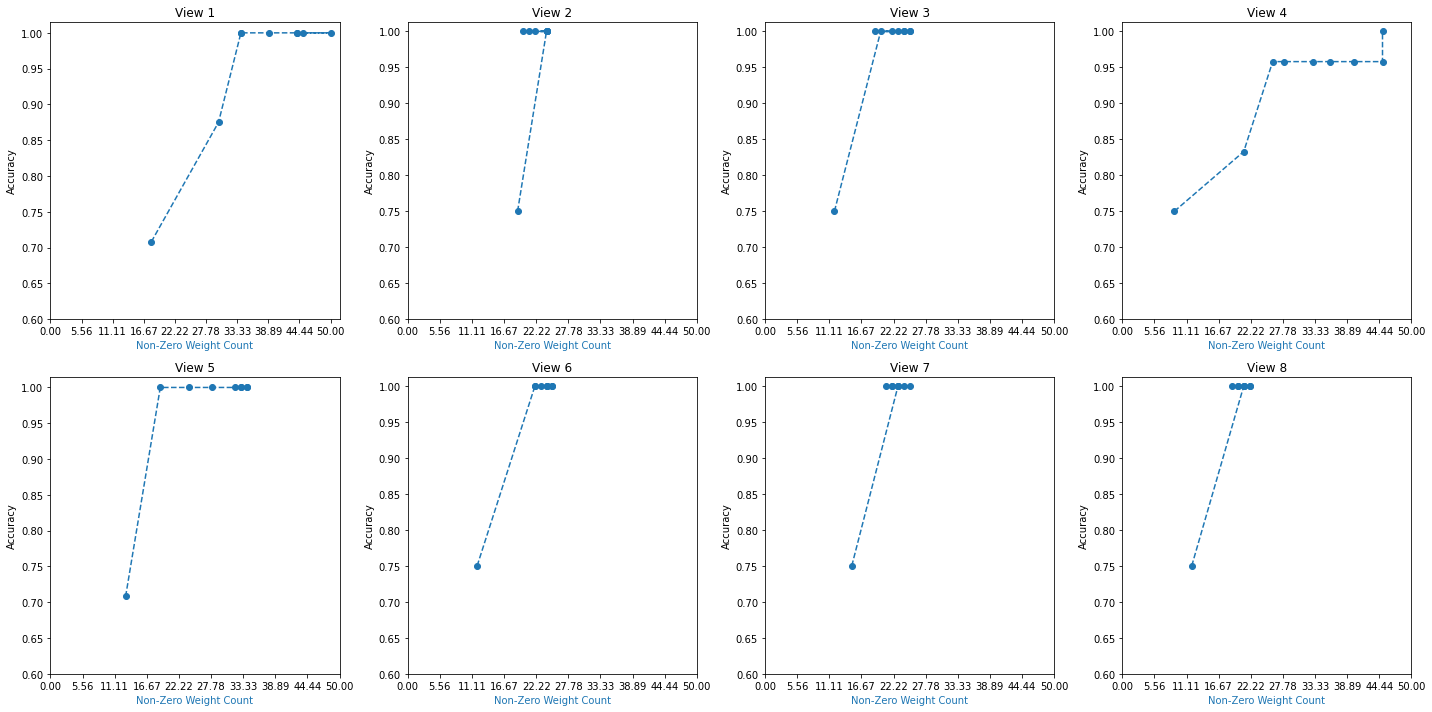

In [70]:
fig=plt.figure(figsize=(20, 10))

for j in range(8):
    #Non-Zero Weight Count Plot
    ax=fig.add_subplot(2, 4, j+1, label="1")

    ax.plot(all_nonzero_weight_cnts[j], all_accuracies[j], marker='o', color="C0", linestyle='dashed')

    ax.set_xlabel("Non-Zero Weight Count", color="C0")
    ax.set_ylabel("Accuracy", color="Black")
    ax.tick_params(axis='x', colors="Black")
    ax.tick_params(axis='y', colors="Black")
    ax.set_yticks([x * 0.05 for x in range(12, 21)])
    ax.set_xticks(np.linspace(0,50,10))

    ax.set_title("View "+str(j+1))

fig.tight_layout()

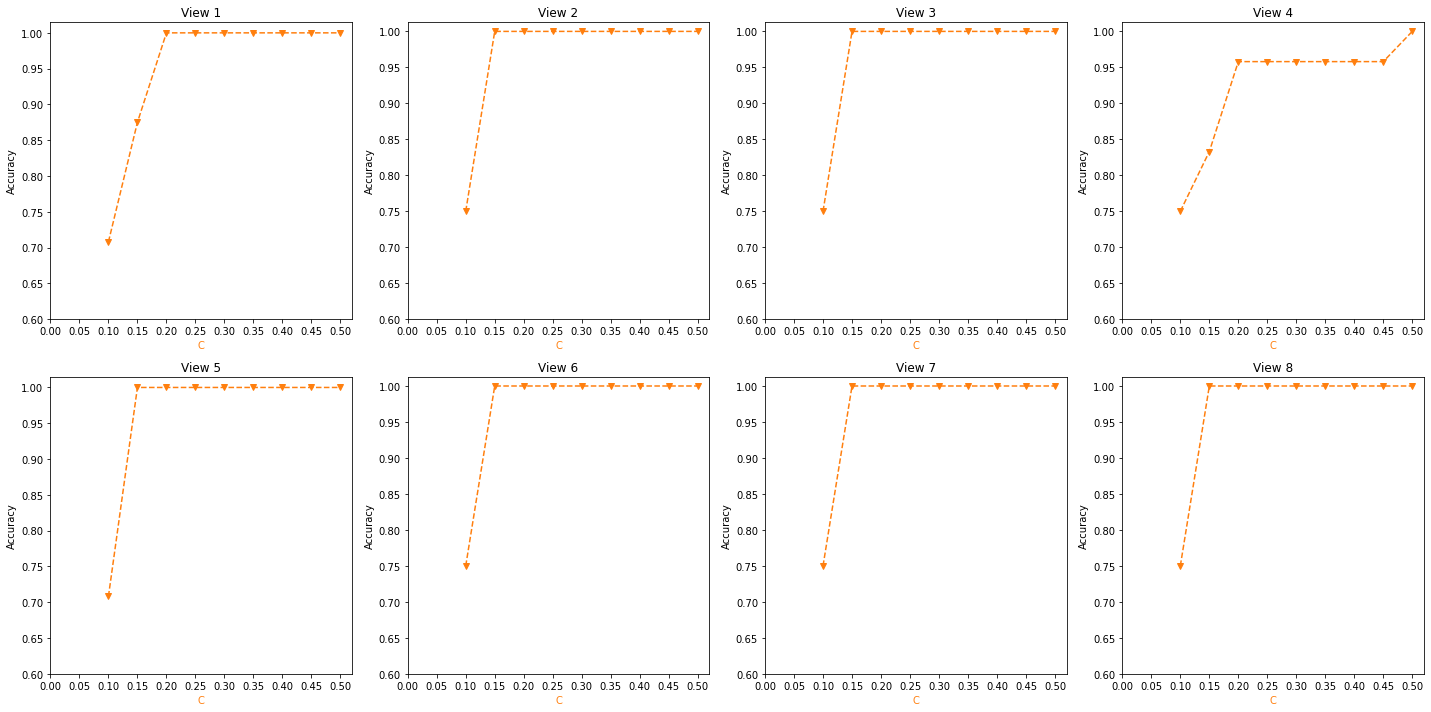

In [73]:
fig=plt.figure(figsize=(20, 10))

for j in range(8):
    #C Value Line
    ax2=fig.add_subplot(2, 4, j+1, label="2")

    ax2.plot(regularizers, all_accuracies[j], marker='v', color="C1", linestyle='dashed')

    # ax2.xaxis.tick_top()
    ax2.set_xlabel('C', color="C1") 
    ax2.set_ylabel("Accuracy", color="Black")
    ax2.tick_params(axis='x', colors="Black")
    ax2.set_yticks([x * 0.05 for x in range(12, 21)])
    ax2.set_xticks(np.linspace(0,.5,11))
    # ax2.xaxis.set_label_position('top')

    ax2.set_title("View "+str(j+1))

fig.tight_layout()